In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
!jupyter nbextension enable --py widgetsnbextension



Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [90]:

def Obtain_Size(img_input):
    img=cv2.imread(img_input)
    return img,img.shape

w=interactive(Obtain_Size, img_input='Anaconda/jidan.jpg')
type(w)
display(w)
img,img_shape=w.result
row=img_shape[0]
column=img_shape[1]


interactive(children=(Text(value='Anaconda/jidan.jpg', description='img_input'), Output()), _dom_classes=('wid…

In [98]:
@interact(img=fixed(img), img_shape=fixed(img_shape),img_output='Region_of_Interest.jpg', a_x=(0,column,1),a_y=(0,row,1),b_x=(0,column,1),b_y=(0,row,1),c_x=(0,column,1),c_y=(0,row,1),d_x=(0,column,1),d_y=(0,row,1))
def Region_of_Interest(img, img_shape, img_output, a_x=column ,a_y=0.8*row,b_x=0.5*column,b_y=0.3*row,c_x=0.5*column,c_y=0.3*row,d_x=0,d_y=0.8*row):
    mask = np.zeros_like(img)
    channel = 1
    if len(img_shape) > 2:
        channel = img_shape[2]
    mask_color = (255,)*channel
    cv2.fillPoly(mask, np.array([[[a_x,a_y],[b_x,b_y],[c_x,c_y],[d_x,d_y]]]), mask_color)
    masked = cv2.bitwise_and(img,mask)
    plt.figure(figsize=(20,10))
    _=plt.subplot(121),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(masked)
    plt.title('Masked Image'), plt.xticks([]), plt.yticks([])

    plt.show()

interactive(children=(Text(value='Region_of_Interest.jpg', description='img_output'), IntSlider(value=1920, de…

In [101]:
def Canny_Edge_Detector(img_input, img_output, quality=100, lower_threshold=200, upper_threshold=230, aperture_size=3, L2gradient=False):

    img = cv2.imread(img_input,0)
    edges = cv2.Canny(img,lower_threshold, upper_threshold, apertureSize=aperture_size, L2gradient=L2gradient)
    cv2.imwrite(img_output, edges)
    plt.figure(figsize=(20,10))
    _=plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

In [102]:
interact(Canny_Edge_Detector, img_input='..g_output='edge_detection.jpg',\
        quality=(0,100,1),\
         lower_threshold=(0,255,1), upper_threshold=(0, 255, 1),\
        aperture_size=(3,7,2), L2gradient=False);

interactive(children=(Text(value='Anaconda/jidan.jpg', description='img_input'), Text(value='edge_detection.jp…

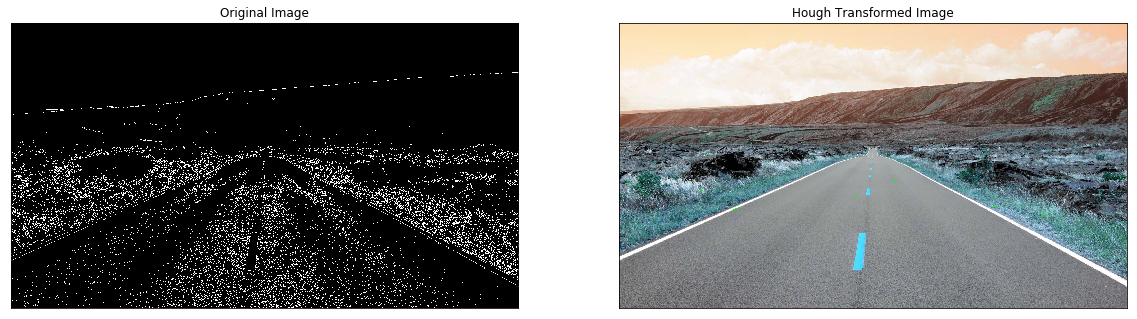

In [106]:
img = cv2.imread('edge_detection.jpg',0)
min_line_len = 100
max_line_Gap = 10
lines = cv2.HoughLinesP(img,1,np.pi/180,100,min_line_len, max_line_Gap)
for i in range(10):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('Hough.jpg', img)
plt.figure(figsize=(20,10))
_=plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(original)
plt.title('Hough Transformed Image'), plt.xticks([]), plt.yticks([])

plt.show()